# Plimton 322 の解読 (1)

## 粘土板に楔形文字を書く
* [Writing Cuneiform (video) | Khan Academy](https://www.khanacademy.org/humanities/ancient-art-civilizations/ancient-near-east1/the-ancient-near-east-an-introduction/v/cuneiform)

## Plimpton 322 の外観
* [Mathematicians Crack Mystery of Babylonian Clay Tablet ‘Plimpton 322’ | Archaeology, Mathematics | Sci-News.com](http://www.sci-news.com/archaeology/babylonian-clay-tablet-plimpton-322-05163.html)

![fig-2](./fig-2.jpeg)

![fig-3](./fig-3.jpeg)

## Plimpton 322 の数表を読み込む
* [Plimpton 322 - Wikipedia](https://en.wikipedia.org/wiki/Plimpton_322)
  - 数表-1: 60進法
    - 異なる推定値を括弧で示し、1番目と4番目のコラムのうち内容が推定される破損部分を斜体で示し、6つの推定誤りを太字で示し、その下の角括弧に一般に提案されている訂正を示す
    - 3列目の53を2倍の値である1 46に置き換えるか、2列目の56を半分の値である28に置き換えるか
  - 数表-2: 10進法
    - 11行目の2列目と3列目には、15行目を除く他の行とは異なり、共通因子が含まれている。$45$ と$1 15$はバビロニア数学では$3/4$と$5/4$と解釈される可能性があり、これはおなじみの標準的な直角三角形 $(3,4,5)$ を縮小した$(0.75, 1, 1.25)$ と一致するものです
    - 15行目も2列目が28、3列目が53と修正される可能性がある

In [1]:
!pip install -U lxml

In [2]:
import pandas as pd

In [3]:
dfs=pd.read_html('https://en.wikipedia.org/wiki/Plimpton_322')
dfs[0]

,Plimpton 322,Plimpton 322.1
0,"The Plimpton 322 clay tablet, with numbers wri...","The Plimpton 322 clay tablet, with numbers wri..."
1,Height,9 cm
2,Width,13 cm
3,Created,c. 1800 BC
4,Present location,"New York City, New York, United States"


In [4]:
dfs[1]

,takiltum of the diagonal from which 1 is torn out so that the width comes up,ÍB.SI8 of the width,ÍB.SI8 of the diagonal,its line
0,(1) 59 00 15,1 59,2 49,1st
1,(1) 56 56 58 14 56 15 (1) 56 56 58 14 [50 06] 15,56 07,3 12 01 [1 20 25],2nd
2,(1) 55 07 41 15 33 45,1 16 41,1 50 49,3rd
3,(1) 53 10 29 32 52 16,3 31 49,5 09 01,4th
4,(1) 48 54 01 40,1 05,1 37,5th
5,(1) 47 06 41 40,5 19,8 01,6th
6,(1) 43 11 56 28 26 40,38 11,59 01,7th
7,(1) 41 33 59 03 45 (1) 41 33 [45 14] 03 45,13 19,20 49,8th
8,(1) 38 33 36 36,9 01 [8] 01,12 49,9th
9,(1) 35 10 02 28 27 24 26 40,1 22 41,2 16 01,10th


In [7]:
dfs[2]

,or,Short Side,Diagonal,Row #
0,(1).9834028,119,169,1
1,(1).9491586,3367,4825,2
2,(1).9188021,4601,6649,3
3,(1).8862479,12709,18541,4
4,(1).8150077,65,97,5
5,(1).7851929,319,481,6
6,(1).7199837,2291,3541,7
7,(1).6927094,799,1249,8
8,(1).6426694,481,769,9
9,(1).5861226,4961,8161,10


### 11行目に着目する

In [5]:
dfs[1].take([10])

,takiltum of the diagonal from which 1 is torn out so that the width comes up,ÍB.SI8 of the width,ÍB.SI8 of the diagonal,its line
10,(1) 33 45,45,1 15,11th


In [6]:
dfs[2].take([10])

,or,Short Side,Diagonal,Row #
10,(1).5625,45*,75*,11


In [10]:
import math
math.sqrt(75**2 - 45**2)

60.0

```{note}
$(45, 60, 75)$という三数は、$60$進法の基数を含むため、古代バビロニア人には応用し易い組み合わせだったと考えられます。

$10$進法では、既約表現である$(3, 4, 5)$を使います。
```

## 数表の公式

* [ピタゴラス数の求め方とその証明 | 高校数学の美しい物語](https://manabitimes.jp/math/661)

正の整数 $p$, $q$ $(p>q)$ に対して、

$$
  \begin{align}
    a & =  2 p q \\
    b & =  p^2 - q^2\\
    d & =  p^2 + q^2\\
  \end{align}
$$

とおくと、$a$, $b$, $d$ はピタゴラスの三数となり、$a^2+b^2 = d^2$ を満たす。

解) 恒等式

$$
  (x-y)^2 = (x+y)^2 - 4xy
$$

に対して $x=p^2$, $y=q^2$ とおいて $p$, $q$ を消去する。

$$
  \begin{align}
    (p^2-q^2)^2 &= (p^2+q^2)^2 - 4p^2q^2 \\
    b^2 &= d^2 - a^2
  \end{align}
$$

```{note}
方程式$(2)$は、次の図の面積の関係を表しています。
```

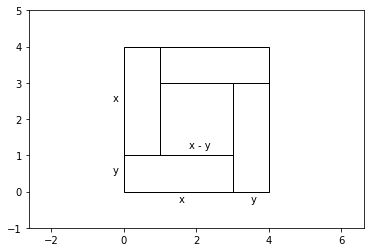

In [2]:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

p0 = Polygon([(0,0), (3,0), (3,1), (0,1), ], fill=False)
p1 = Polygon([(3,0), (4,0), (4,3), (3,3), ], fill=False)
p2 = Polygon([(4,3), (4,4), (1,4), (1,3), ], fill=False)
p3 = Polygon([(1,1), (1,4), (0,4), (0,1), ], fill=False)

fig, ax = plt.subplots(1,1)

ax.add_patch(p0)
ax.add_patch(p1)
ax.add_patch(p2)
ax.add_patch(p3)
ax.axis('equal')
ax.set(xlim=(0,4),ylim=(-1,5))

plt.text(1.5,-0.3,'x')
plt.text(3.5,-0.3,'y')
plt.text(-0.3,2.5,'x')
plt.text(-0.3,0.5,'y')
plt.text(1.8,1.2, 'x - y')
plt.show()

Plimpton 322との対応は次の表の通りである:

|#1 |#2 |#3 |
|:-:|:-:|:-:|
|$$\left(\frac{d}{a}\right)^2$$|$$b$$      |$$d$$      |
|$$\frac{1}{4}\left(\frac{p}{q}+\frac{q}{p}\right)^2$$|$$p^2-q^2$$|$$p^2+q^2$$|

命題) Plimpton 322は、互いに素な正の整数 $p$, $q$ のうち、

$$
  \frac{9}{5} \leq \frac{p}{q} \leq \frac{12}{5}
$$

を満たす組み合わせについて、

$$
\frac{d}{a} = \frac{1}{2}\left(\frac{p}{q}+\frac{q}{p}\right)
$$

をキーとして降順に並べたものである。